# Import Libraries

In [91]:
import math
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import umap

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score, average_precision_score

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay
import numpy as np, matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Read Data

In [2]:
columns = ["age",
           "class of worker",
           "detailed industry recode",
           "detailed occupation recode",
           "education",
           "wage per hour",
           "enrolled in edu inst last wk",
           "marital status",
           "major industry code",
           "major occupation code",
           "race",
           "hispanic origin",
           "sex",
           "member of a labor union",
           "reason for unemployment",
           "full or part time employment stat",
           "capital gains",
           "capital losses",
           "divdends from stocks",
           "tax filer status",
           "region of previous residence",
           "state of previous residence",
           "detailed household and family stat",
           "detailed household summary in household",
           "instance weight",
           "migration code change in msa",
           "migration code change in reg",
           "migration code move within reg",
           "live in this house 1 year ago",
           "migration prev res in sunbelt",
           "num persons worked for employer",
           "family members under 18",
           "country of birth father",
           "country of birth mother",
           "country of birth self",
           "citizenship",
           "own business or self employed",
           "fill inc questionnaire for veterans admin",
           "veterans benefits",
           "weeks worked in year",
           "year",
           "target"]

columns=list(map(lambda column: "_".join(column.split(" ")), columns))

In [16]:
df = (
pd.read_csv("census_income_learn.csv",header=None, names=columns,)
     # pd.read_csv("census_income_learn.csv",header=None)
     .assign(target=lambda df: df.target.isin([' 50000+.']))
)
df.head(5)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,False
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,False
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,False
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,False
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,False


In [27]:
df_test = (
pd.read_csv("census_income_test.csv",header=None, names=columns,)
     # pd.read_csv("census_income_learn.csv",header=None)
     .assign(target=lambda df: df.target.isin([' 50000+.']))
)
df_test.head(5)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,False
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,False
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,False
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,False
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,False


# EDA

In [116]:
df['target'].value_counts(normalize=True)

target
False    0.937942
True     0.062058
Name: proportion, dtype: float64

## Numerical Feature Distributions

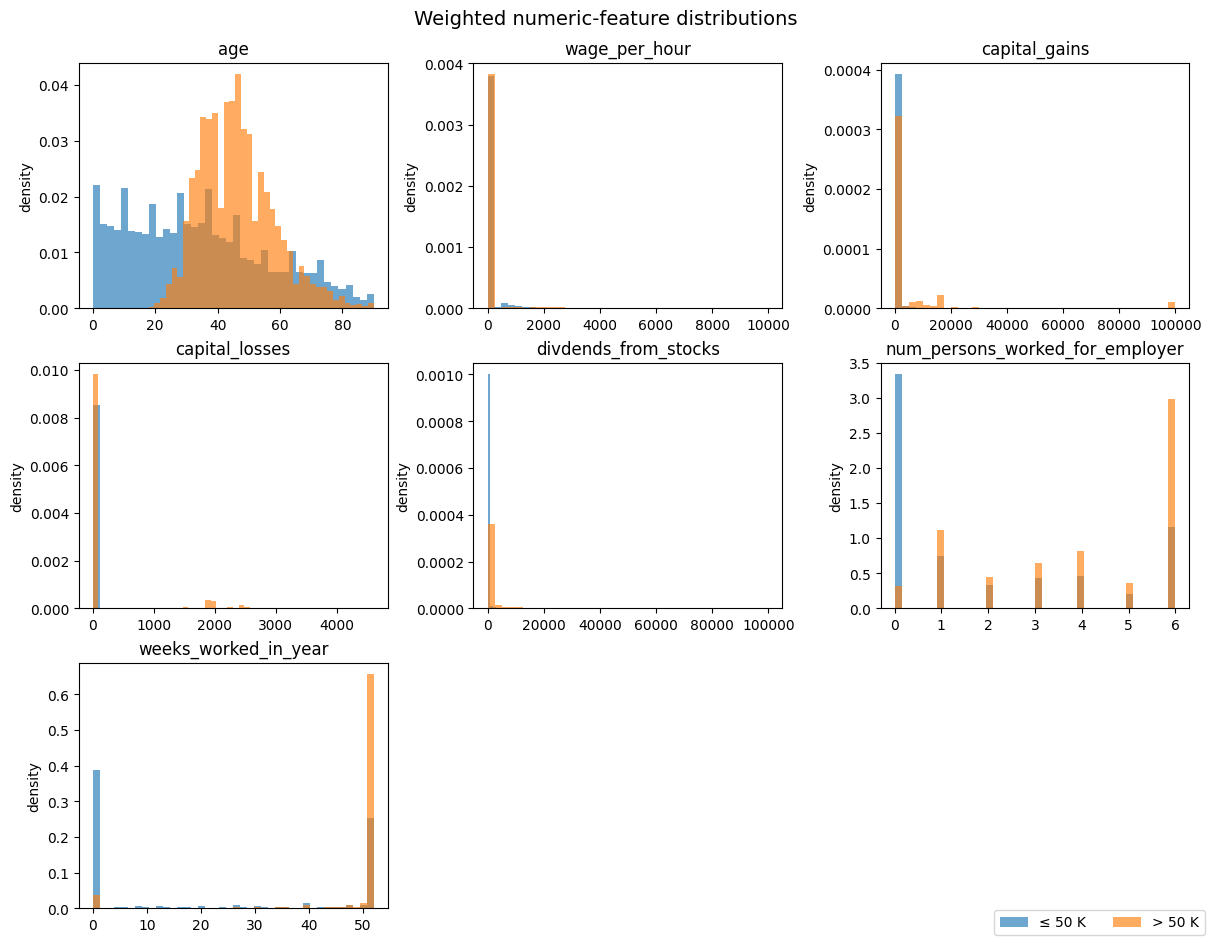

In [ ]:
numeric_cols = ["age",
                "wage_per_hour",
                "capital_gains",
                "capital_losses",
                "divdends_from_stocks",
                "num_persons_worked_for_employer",
                "weeks_worked_in_year"]

target_col   = "target"
weight_col   = "instance_weight"

pos_label    = True         
neg_label    = False
use_weights = False


pos = df[df[target_col] == pos_label]
neg = df[df[target_col] == neg_label]

use_weights = True         
bins        = 40            
alpha       = 0.65          
n_cols      = 3

n_plots = len(numeric_cols)
n_rows  = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(4 * n_cols, 3 * n_rows),
    sharex=False,
    sharey=False,
    constrained_layout=True,
)
axes = np.asarray(axes).reshape(-1)        

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    w_neg = neg[weight_col] if use_weights else None
    w_pos = pos[weight_col] if use_weights else None

    # overlapping histograms
    ax.hist(
        neg[col],
        bins=bins,
        density=True,
        weights=w_neg,
        alpha=alpha,
        label="≤ 50 K",
    )
    ax.hist(
        pos[col],
        bins=bins,
        density=True,
        weights=w_pos,
        alpha=alpha,
        label="> 50 K",
        color="tab:orange",
    )

    ax.set_title(col)
    ax.set_ylabel("density")

for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

# single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", ncol=2)

fig.suptitle(
    f'{"Weighted" if use_weights else "Unweighted"} numeric-feature distributions',
    y=1.03,
    fontsize=14,
)

plt.show()


    - Conditional Probability given person Invests

In [140]:
df.query("capital_gains > 0").target.value_counts(normalize=True)

target
False    0.673126
True     0.326874
Name: proportion, dtype: float64

In [148]:
32/6

5.333333333333333

In [141]:
df.query("divdends_from_stocks > 500").target.value_counts(normalize=True)

target
False    0.689946
True     0.310054
Name: proportion, dtype: float64

In [142]:
df.query("capital_losses > 0").target.value_counts(normalize=True)

target
False    0.700717
True     0.299283
Name: proportion, dtype: float64

## Categorical Distribution

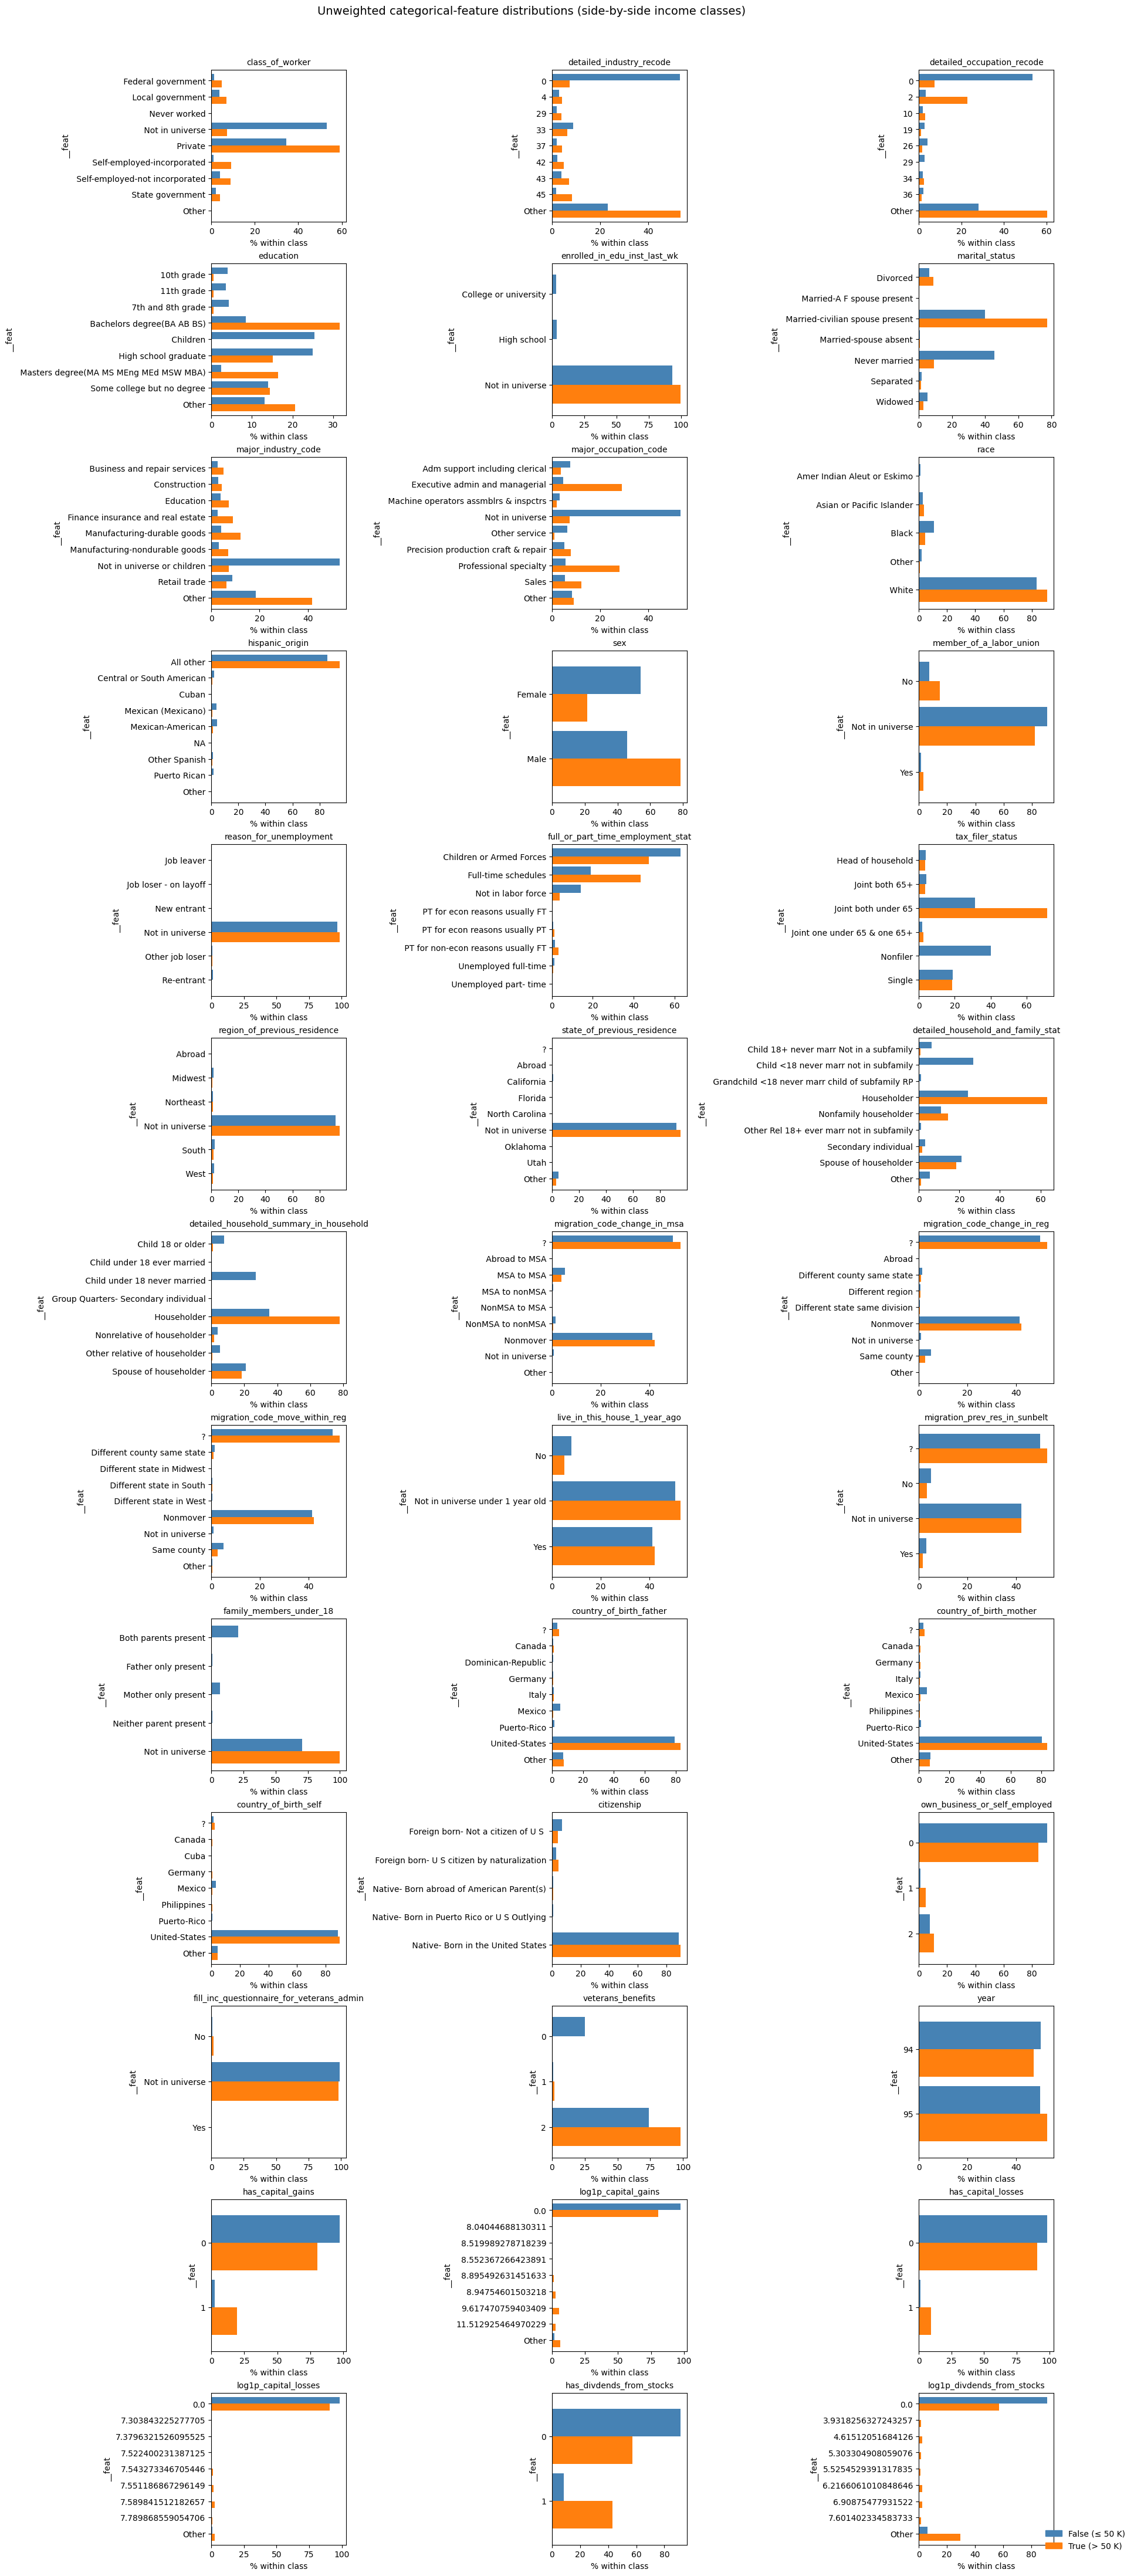

In [ ]:
target_col   = "target"          
weight_col   = "instance_weight"
use_weights  = False           
top_k        = 8  

cat_cols = [c for c in df.columns                 
            if c not in numeric_cols + [target_col, weight_col]]

def class_pct_table(data: pd.DataFrame, feature: str, k=8,
                    w_col=None, classes=(False, True)) -> pd.DataFrame:
    """Return a % table indexed by feature level, with one column per class."""
    s = data[feature]
    top = s.value_counts().nlargest(k).index
    s2  = s.where(s.isin(top), "Other")
    tmp = data.assign(__feat=s2)

    if w_col is None:                                # un-weighted
        tbl = (tmp.groupby([target_col, "__feat"])
                   .size()
                   .unstack(level=0, fill_value=0))
    else:                                            # weighted
        tbl = (tmp.pivot_table(index="__feat", columns=target_col,
                               values=w_col, aggfunc="sum", fill_value=0))

    pct = tbl.div(tbl.sum(axis=0), axis=1) * 100
    return pct.reindex(columns=classes, fill_value=0)

n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(6 * n_cols, 3.3 * n_rows),
                         constrained_layout=True)

axes = axes.ravel()   

for i, col in enumerate(cat_cols):
    ax  = axes[i]
    pct = class_pct_table(df, col, k=top_k,
                          w_col=weight_col if use_weights else None)

    pct.plot.barh(ax=ax,
                  color=["steelblue", "tab:orange"],
                  width=0.85,
                  legend=False)          

    ax.invert_yaxis()                    
    ax.set_xlabel("% within class")
    ax.set_title(col, fontsize=10)

# remove any empty axes
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

handles = [plt.Rectangle((0,0),1,1,color=c) for c in ["steelblue","tab:orange"]]
fig.legend(handles, ["False (≤ 50 K)", "True (> 50 K)"],
           loc="upper left", bbox_to_anchor=(0.98, 0.02), frameon=False)

fig.suptitle(f'{("Weighted" if use_weights else "Unweighted")} categorical-feature distributions '
             '(side-by-side income classes)', y=1.02, fontsize=14)

plt.show()

    - Conditional Probability given Masters

In [149]:
df.query("education == ' Masters degree(MA MS MEng MEd MSW MBA)'").target.value_counts(normalize=True)

target
False    0.688427
True     0.311573
Name: proportion, dtype: float64

# Clustering Demographic

/home/abdulmoiz/dataiku_assessment/dataiku/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_17844/3291913824.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap   = plt.cm.get_cmap("tab10", np.unique(labels).size)


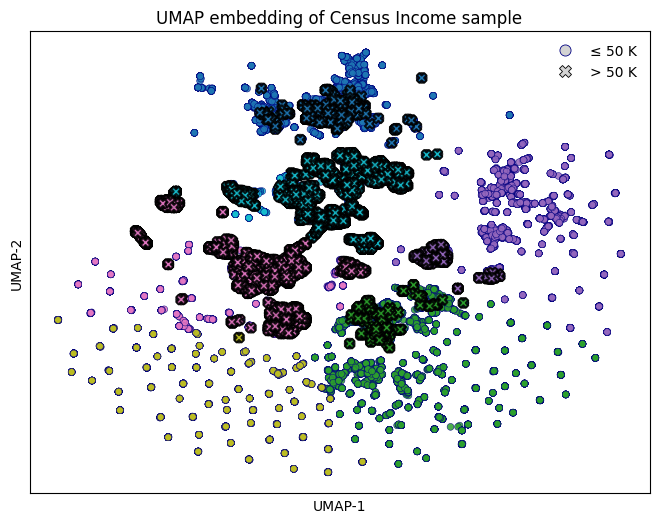

In [ ]:
# ---------- CONFIG ------------------------------------------------
RNG_SEED    = 42
SAMPLE_SIZE = 70000        
EMBED_DIMS  = 2           
SVD_COMPS   = 50          
N_CLUSTERS  = 6            

# ---------- SUBSAMPLE (optional) ---------------------------------
pos_df = df[df[target_col] == True]
neg_df = df[df[target_col] == False]

needed_neg = max(0, SAMPLE_SIZE - len(pos_df))      # how many negatives to keep
neg_sample = (neg_df.sample(needed_neg, random_state=RNG_SEED)
              if needed_neg < len(neg_df) else neg_df)

df_sample  = pd.concat([pos_df, neg_sample]).sample(frac=1, random_state=RNG_SEED)

X = df_sample.drop(columns=["target", "instance_weight"])
y = df_sample["target"] 

# ---------- PREPROCESSING PIPELINE -------------------------------
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

reducer = Pipeline([
    ("prep", pre),
    ("svd",  TruncatedSVD(n_components=SVD_COMPS, random_state=RNG_SEED)),
    ("umap", umap.UMAP(n_components=EMBED_DIMS,
                       random_state=RNG_SEED, metric="cosine"))
])

embedding = reducer.fit_transform(X)

# ---------- CLUSTERING -------------------------------------------
kmeans  = KMeans(n_clusters=N_CLUSTERS, random_state=RNG_SEED)
labels  = kmeans.fit_predict(embedding)

cmap   = plt.cm.get_cmap("tab10", np.unique(labels).size)
sizes  = np.where(y, 48, 24)          
edges  = np.where(y, "black", "navy") 
lw     = np.where(y, 1.5, 0.4)      
markers= np.where(y, "X", "o")       

fig, ax = plt.subplots(figsize=(8, 6))

for k in np.unique(labels):
    mask = labels == k
    ax.scatter(embedding[mask, 0],
               embedding[mask, 1],
               s=sizes[mask],
               c=[cmap(k)],
               marker="o",            
               edgecolors=edges[mask],
               linewidths=lw[mask],
               alpha=0.85)

mask_hi = y
ax.scatter(embedding[mask_hi, 0],
           embedding[mask_hi, 1],
           s=sizes[mask_hi],
           c=[cmap(l) for l in labels[mask_hi]],
           marker="X",
           edgecolors="black",
           linewidths=1.5,
           alpha=0.85)

ax.set(title="UMAP embedding of Census Income sample",
       xlabel="UMAP-1", ylabel="UMAP-2")
ax.set_xticks([]); ax.set_yticks([])
ax.grid(alpha=0.2, linestyle=":")

# custom legend
legend_elems = [
    Line2D([0], [0], marker="o", color="w", label="≤ 50 K",
           markerfacecolor="lightgrey", markeredgecolor="navy",
           markersize=8, markeredgewidth=0.6),
    Line2D([0], [0], marker="X", color="w", label="> 50 K",
           markerfacecolor="lightgrey", markeredgecolor="black",
           markersize=8, markeredgewidth=0.6)
]
ax.legend(handles=legend_elems, loc="upper right", frameon=False)

plt.show()

In [174]:
cluster_id = pd.Series(labels, index=df_sample.index, name="cluster")
df_labeled = pd.concat([df_sample, cluster_id], axis=1)
purity = df_labeled.groupby("cluster")["target"].mean()  # % earning >50K
print(purity.sort_values(ascending=False))

cluster
5    0.309827
3    0.292221
2    0.057886
0    0.049180
1    0.030512
4    0.000217
Name: target, dtype: float64


In [177]:
def describe_cluster(k, p=(0.05, 0.25, 0.5, 0.95)):
    sub = df_labeled[df_labeled.cluster == k]

    num  = (sub.select_dtypes("number")
              .describe(percentiles=p).T)          # mean, std, percentiles…
    cat  = (sub.select_dtypes("object")
              .describe().T[["top", "freq"]])

    return pd.concat([num, cat])


    - white males with veteran benefits working in Private sector as a professional specialty

In [178]:
describe_cluster(5)

,count,mean,std,min,5%,25%,50%,95%,max,top,freq
age,19314.0,40.359739,12.861337,15.00,21.0000,31.0000,40.000,63.00,90.0,NaN,NaN
detailed_industry_recode,19314.0,30.440561,13.881302,0.00,3.0000,24.0000,33.000,47.00,51.0,NaN,NaN
detailed_occupation_recode,19314.0,20.245936,13.344943,0.00,2.0000,8.0000,19.000,41.00,46.0,NaN,NaN
wage_per_hour,19314.0,105.979186,386.571611,0.00,0.0000,0.0000,0.000,850.00,6900.0,NaN,NaN
capital_gains,19314.0,783.891788,3156.947095,0.00,0.0000,0.0000,0.000,7298.00,27828.0,NaN,NaN
capital_losses,19314.0,112.477685,469.758752,0.00,0.0000,0.0000,0.000,1590.00,4608.0,NaN,NaN
divdends_from_stocks,19314.0,443.575282,3556.521539,0.00,0.0000,0.0000,0.000,1273.35,99999.0,NaN,NaN
instance_weight,19314.0,1790.762027,1031.391756,47.83,408.5295,1072.9325,1647.115,3730.22,16349.2,NaN,NaN
num_persons_worked_for_employer,19314.0,3.822616,2.081027,0.00,1.0000,2.0000,4.000,6.00,6.0,NaN,NaN
own_business_or_self_employed,19314.0,0.331055,0.719042,0.00,0.0000,0.0000,0.000,2.00,2.0,NaN,NaN


    - People not in the work force

In [180]:
describe_cluster(4)

,count,mean,std,min,5%,25%,50%,95%,max,top,freq
age,4606.0,8.954624,11.475069,0.00,1.000,3.00,7.00,15.0,90.0,NaN,NaN
detailed_industry_recode,4606.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0,0.0,NaN,NaN
detailed_occupation_recode,4606.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0,0.0,NaN,NaN
wage_per_hour,4606.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0,0.0,NaN,NaN
capital_gains,4606.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0,0.0,NaN,NaN
capital_losses,4606.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0,0.0,NaN,NaN
divdends_from_stocks,4606.0,1.167607,26.437728,0.00,0.000,0.00,0.00,0.0,1000.0,NaN,NaN
instance_weight,4606.0,1680.724388,959.913903,43.26,331.005,1013.75,1609.01,3457.0,10412.2,NaN,NaN
num_persons_worked_for_employer,4606.0,0.000868,0.036086,0.00,0.000,0.00,0.00,0.0,2.0,NaN,NaN
own_business_or_self_employed,4606.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0,0.0,NaN,NaN


    - Uneducated Females

In [181]:
describe_cluster(2)

,count,mean,std,min,5%,25%,50%,95%,max,top,freq
age,9035.0,19.479911,17.389008,0.00,1.000,6.000,14.00,53.000,90.0,NaN,NaN
detailed_industry_recode,9035.0,10.039956,16.212983,0.00,0.000,0.000,0.00,43.000,51.0,NaN,NaN
detailed_occupation_recode,9035.0,7.461206,12.968462,0.00,0.000,0.000,0.00,36.000,46.0,NaN,NaN
wage_per_hour,9035.0,26.229552,165.119863,0.00,0.000,0.000,0.00,0.000,2512.0,NaN,NaN
capital_gains,9035.0,177.985501,1457.668016,0.00,0.000,0.000,0.00,0.000,27828.0,NaN,NaN
capital_losses,9035.0,0.169673,11.527892,0.00,0.000,0.000,0.00,0.000,880.0,NaN,NaN
divdends_from_stocks,9035.0,42.176093,391.928325,0.00,0.000,0.000,0.00,0.000,10160.0,NaN,NaN
instance_weight,9035.0,1740.940650,1027.827792,81.87,364.462,1045.085,1593.47,3622.435,10708.4,NaN,NaN
num_persons_worked_for_employer,9035.0,1.314222,2.146322,0.00,0.000,0.000,0.00,6.000,6.0,NaN,NaN
own_business_or_self_employed,9035.0,0.182402,0.565932,0.00,0.000,0.000,0.00,2.000,2.0,NaN,NaN


# Modeling

In [28]:
X = df.drop(columns=[target_col, weight_col])
y = df[target_col].astype(int)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

In [69]:
# ── 0 · Identify object-type columns (categoricals that aren’t numeric) ──
cat_cols = X_train.select_dtypes("object").columns.tolist()

# ── 1 · Replace literal question-marks with the string "Missing" ─────────
for c in cat_cols:
    X_train[c] = X_train[c].replace("?", "Missing")
    X_val[c]   = X_val[c].replace("?", "Missing")

# ── 2 · Cast to pandas Categorical with a common level set ───────────────
for c in cat_cols:
    # gather all levels seen in train+val so LightGBM knows the full set
    combined = pd.concat([X_train[c], X_val[c]], axis=0)
    categories = pd.Categorical(combined).categories

    X_train[c] = pd.Categorical(X_train[c], categories=categories)
    X_val[c]   = pd.Categorical(X_val[c],   categories=categories)


## Baseline - Logistic Regression

In [70]:
logit = Pipeline([
    ("prep", pre),                          # same ColumnTransformer
    ("clf" , LogisticRegression(
                 max_iter=1000,
                 class_weight="balanced",          # handles 6 % minority
                 solver="lbfgs"))
])

logit.fit(X_train, y_train)                       # ← no sample_weight
proba = logit.predict_proba(X_val)[:, 1]

print("ROC-AUC :", roc_auc_score(y_val, proba))
print("PR-AUC  :", average_precision_score(y_val, proba))

ROC-AUC : 0.9444500952595565
PR-AUC  : 0.6042372893911069


## LightGBM

In [79]:
lgbm = LGBMClassifier(
    objective="binary",
    alpha=0.25, gamma=2.0,
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=["auc", "average_precision"],
    callbacks=[early_stopping(200, verbose=True),
               log_evaluation(100)]
)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 9286, number of negative: 140356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 149642, number of used features: 40
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.062055 -> initscore=-2.715674
[LightGBM] [Info] Start training from score -2.715674
Training until validation scores don't improve for 200 rounds
[100]	valid_0's auc: 0.952451	valid_0's average_precision: 0.675792	valid_0's binary_logloss: 0.116108
[200]	valid_0's auc: 0.954515	valid_0's average_precision: 0.688758	valid_0's binary_logloss: 0.111074
[300]	valid_0's auc: 0.955201	valid

,boosting_type,'gbdt'
,num_leaves,64
,max_depth,-1
,learning_rate,0.03
,n_estimators,2000
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


    - Better Metrics

In [80]:
proba = lgbm.predict_proba(X_val)[:, 1]
print("ROC-AUC :", roc_auc_score(y_val, proba))
print("PR-AUC  :", average_precision_score(y_val, proba))

[LightGBM] [Warning] Unknown parameter: gamma
ROC-AUC : 0.9554795957592583
PR-AUC  : 0.6962138289555024


### Optimizing Threshold

In [92]:
scores = [
    (thr_, f1_score(y_val, proba >= thr_))
    for thr_ in np.unique(thr)
]
best_thr, best_f1 = max(scores, key=lambda t: t[1])
print(f"Best F1={best_f1:.3f} at threshold={best_thr:.4f}")

Best F1=0.631 at threshold=0.3213


# Testing

In [94]:
X_test = df_test.drop(columns=[target_col, weight_col])
y_test = df_test[target_col].astype(int)

In [95]:
# ── 0 · Identify object-type columns (categoricals that aren’t numeric) ──
cat_cols = X_test.select_dtypes("object").columns.tolist()

# ── 1 · Replace literal question-marks with the string "Missing" ─────────
for c in cat_cols:
    X_test[c] = X_test[c].replace("?", "Missing")
    # X_val[c]   = X_val[c].replace("?", "Missing")

# ── 2 · Cast to pandas Categorical with the training ───────────────
for c in cat_cols:
    # gather all levels seen in train+val so LightGBM knows the full set

    X_test[c] = pd.Categorical(X_test[c], categories=categories)


In [98]:
proba_test = lgbm.predict_proba(X_test)[:, 1]
print("ROC-AUC :", roc_auc_score(y_test, proba_test))
print("PR-AUC  :", average_precision_score(y_test, proba_test))

[LightGBM] [Warning] Unknown parameter: gamma
ROC-AUC : 0.9225429749700798
PR-AUC  : 0.5307808320823352


    - Threshold from val

Chosen threshold: 0.05090835728207224
F1 Score:  0.45170046303688327


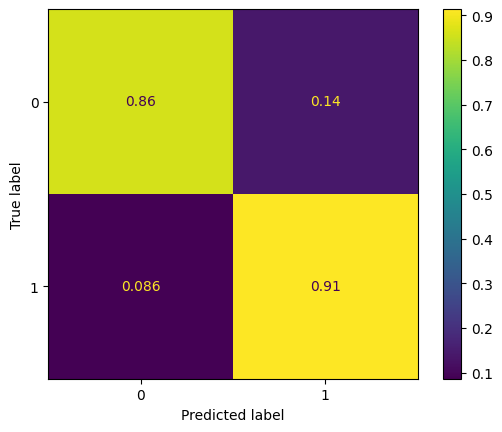

In [155]:
prec, rec, thr = precision_recall_curve(y_val, proba)

# target_prec = 0.32
target_prec = 0.3
best_thr    = thr[np.argmax(prec[:-1] >= target_prec)]
print("Chosen threshold:", best_thr)

y_pred = proba >= best_thr
f1 = f1_score(y_val, y_pred)
print("F1 Score: ", f1)

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize="true")
plt.show()

    - Test

F1 Score:  0.4477144646211647


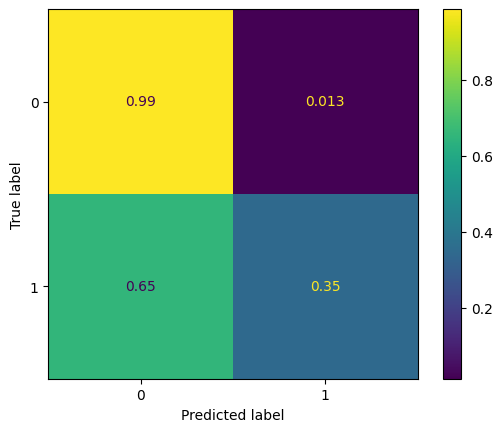

In [175]:
prec, rec, thr = precision_recall_curve(y_test, proba_test)

# target_prec = 0.3
# target_prec = 0.3
# best_thr    = thr[np.argmax(prec[:-1] >= target_prec)]
# print("Chosen threshold:", best_thr)

y_pred = proba_test >= best_thr
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")
plt.show()

Chosen threshold: 0.007538230492962055
F1 Score:  0.4347787374232036


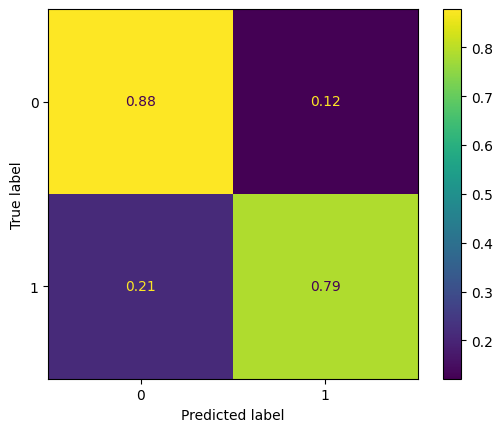

In [ ]:
prec, rec, thr = precision_recall_curve(y_test, proba_test)

target_prec = 0.3
# target_prec = 0.3
best_thr    = thr[np.argmax(prec[:-1] >= target_prec)]
print("Chosen threshold:", best_thr)

y_pred = proba_test >= best_thr
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")
plt.show()